In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
!pip install causallib
from causallib.estimation import IPW

In [64]:
from google.colab import files
data = files.upload()

Saving dimensions.csv to dimensions (3).csv


In [190]:
import io
df = pd.read_csv(io.BytesIO(data['dimensions.csv']))

In [191]:
df

,prevent,detect,response,health,norms,risk
0,23.5,44.8,23.6,21.0,56.3,23.3
1,43.8,74.3,52.0,35.9,53.0,55.7
2,25.7,12.0,19.6,13.1,29.1,51.4
3,27.9,14.2,30.5,9.2,32.4,83.5
4,24.0,17.9,21.7,10.9,41.4,42.2
...,...,...,...,...,...,...
190,23.5,8.7,19.7,12.9,42.2,38.2
191,49.5,57.4,43.0,28.3,64.6,53.4
192,15.1,9.0,19.0,7.6,40.3,23.5
193,24.5,21.9,28.6,20.3,38.0,44.2


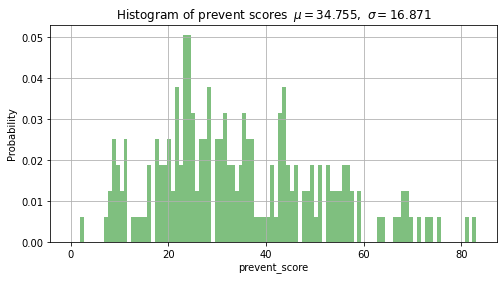

In [182]:
import scipy.stats as ss

plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['prevent'])

# the histogram of the data

plt.hist(df['prevent'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('prevent_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ prevent\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))


plt.show()

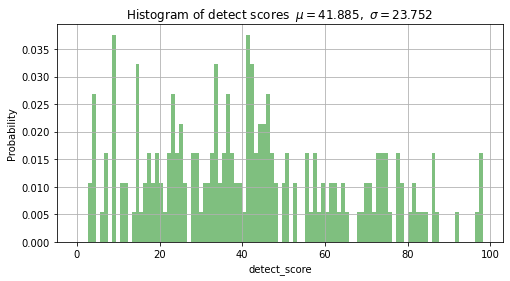

In [183]:
plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['detect'])

# the histogram of the data

plt.hist(df['detect'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('detect_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ detect\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))


plt.show()

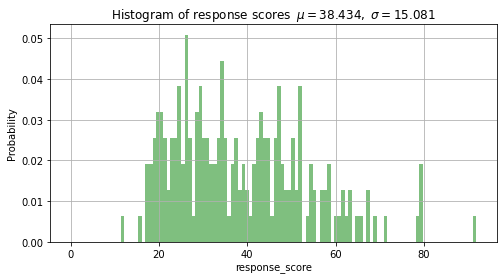

In [184]:
plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['response'])

# the histogram of the data

plt.hist(df['response'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('response_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ response\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))


plt.show()

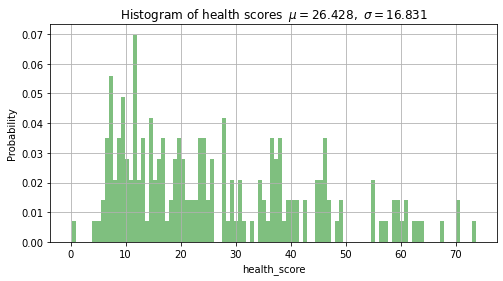

In [192]:
plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['health'])

# the histogram of the data

plt.hist(df['health'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('health_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ health\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))


plt.show()

Text(0.5, 1.0, '$\\mathrm{Histogram\\ of\\ norms\\ scores\\:}\\ \\mu=48.485,\\ \\sigma=12.610$')

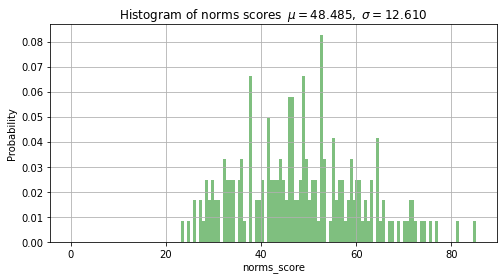

In [186]:
plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['norms'])

# the histogram of the data

plt.hist(df['norms'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(bins, mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('norms_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ norms\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))



Text(0.5, 1.0, '$\\mathrm{Histogram\\ of\\ risk\\ scores\\:}\\ \\mu=55.031,\\ \\sigma=16.161$')

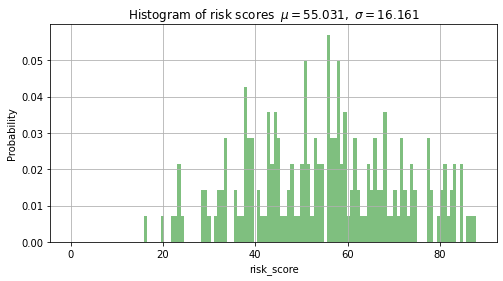

In [187]:
plt.figure(figsize = (8,4))

bins = 10


(mu, sigma) = ss.norm.fit(df['risk'])

# the histogram of the data

plt.hist(df['risk'], 100, density= True, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = ss.norm.pdf(bins, mu, sigma)
plt.plot(y, 'r--', linewidth=2)

#plot
plt.grid(True)
plt.xlabel('risk_score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ risk\ scores\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))



In [193]:
from sklearn.linear_model import LogisticRegression
learner = LogisticRegression(penalty='none',  # No regularization, new in scikit-learn 0.21.*
                             solver='lbfgs',
                             max_iter=10000)
ipw = IPW(learner)

In [194]:
norms = pd.cut(df['norms'], 2, labels=[0,1])
norms

#health = pd.cut(df['health'], 2, labels = [0,1])
#health

0      0
1      0
2      0
3      0
4      0
      ..
190    0
191    0
192    0
193    0
194    0
Name: health, Length: 195, dtype: category
Categories (2, int64): [0 < 1]

In [195]:
#extracting
a = norms
#a = health
y = df.pop("health")
#y = df.pop("norms")
X = df
X


,prevent,detect,response,health,risk
0,23.5,44.8,23.6,21.0,23.3
1,43.8,74.3,52.0,35.9,55.7
2,25.7,12.0,19.6,13.1,51.4
3,27.9,14.2,30.5,9.2,83.5
4,24.0,17.9,21.7,10.9,42.2
...,...,...,...,...,...
190,23.5,8.7,19.7,12.9,38.2
191,49.5,57.4,43.0,28.3,53.4
192,15.1,9.0,19.0,7.6,23.5
193,24.5,21.9,28.6,20.3,44.2


In [196]:
ipw.fit(X, a)
outcomes = ipw.estimate_population_outcome(X, a, y)
effect = ipw.estimate_effect(outcomes[1], outcomes[0])

In [200]:
outcomes

0    44.958451
1    57.932075
dtype: float64

In [201]:
effect

diff    12.973624
dtype: float64

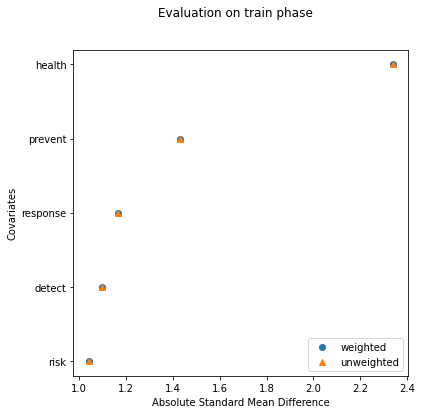

In [199]:
%matplotlib inline
from causallib.evaluation import PropensityEvaluator

evaluator = PropensityEvaluator(ipw)
evaluation_results = evaluator.evaluate_simple(X, a, y, plots=["covariate_balance_love"])

fig = evaluation_results.plots["covariate_balance_love"].get_figure()
fig.set_size_inches(6, 6)  # set a more compact size than default
fig;